In [4]:
#Setup
import pandas as pd
import matplotlib as plt

happiness2015 = pd.read_csv("World_Happiness_2015.csv")

first_5 = happiness2015.head()
first_5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
Country                          5 non-null object
Region                           5 non-null object
Happiness Rank                   5 non-null int64
Happiness Score                  5 non-null float64
Standard Error                   5 non-null float64
Economy (GDP per Capita)         5 non-null float64
Family                           5 non-null float64
Health (Life Expectancy)         5 non-null float64
Freedom                          5 non-null float64
Trust (Government Corruption)    5 non-null float64
Generosity                       5 non-null float64
Dystopia Residual                5 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 608.0+ bytes


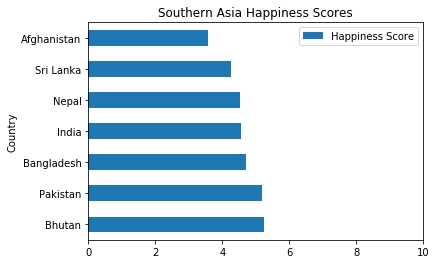

In [5]:
#Visualization refresher
mean_happiness
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

In [10]:
#Aggregating with loops
mean_happiness = {}
#Taking only unique values from region series
arr = happiness2015['Region'].unique() 

#loop over unique values in Region column, assign rows which equal the current value to regioun group, 
#Series.mean() to calculate mean 'Happiness Score' from column, then insert key/val pair to dictionary
for reg in arr:
    region_group = happiness2015[happiness2015['Region'] == reg]
    region_mean = region_group['Happiness Score'].mean()
                               
    mean_happiness[reg] = region_mean
    
    
    

#Breaking down steps from above
#1-Split DF into groups, 2- Apply a function to each group, 3-Combine results into one data structure

In [14]:
#Creating GroupBy Objects - df.groupby('col'), can replace col with lists as well

#Num of uniq values in each region for entire df
#happiness2015['Region'].value_counts()

grouped = happiness2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')


In [24]:
#Exploring GroupBy objects, practice with groups attribute and get_group()
grouped.groups

north_america = happiness2015.iloc[[4,14]]

na_group = grouped.get_group('North America')

equal = north_america == na_group


In [27]:
#Common groupby aggregation methods
#Pandas - Methods	Description 
'''
mean()	Calculates the mean of groups.
sum()	Calculates the sum of group values.
size()	Calculates the size of the groups.
count()	Calculates the count of values in groups.
min()	Calculates the minimum of group values.
max()	Calculates the maximum of group values.
'''
grouped = happiness2015.groupby('Region')
means = grouped.mean()
grouped.mean()


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [28]:
#Aggregating Specific Columns
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()



In [31]:
#Using the agg() method, GroupBy.agg([Func1Name, Func2Name, Func3Name])
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']

def dif(group):
    return (group.max() - group.mean())

happy_mean_max = happy_grouped.agg([np.mean, np.max])
mean_max_dif = happy_grouped.agg(dif)
happy_grouped.agg([np.mean, np.max]) #To show output


,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


In [33]:
#Multiple & custom aggregations with agg()
#e.g. 
happiness2015.groupby('Region')['Happiness Score'].agg(dif)
#Same as 
def dif(group):
    return(group.max() - group.mean())
happy_grouped.agg(dif)


Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [36]:
#Multiple & custom aggregations with agg() continued
#Values in Region Column --> INDEX of the series with VALUES --> Happiness Score aggregated 
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
print(happiness_means)


Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


In [40]:
#Same As above using Aggregation with Pivot Tables
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)
#Returns a DF

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


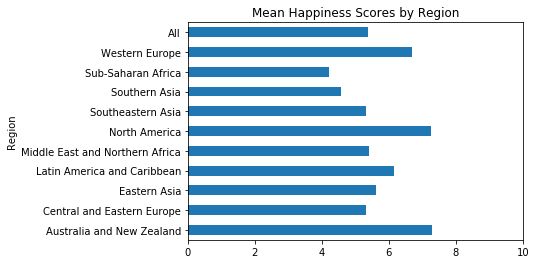

In [41]:
#Aggregation with Pivot Tables Plotting
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Region', legend=False)
world_mean_happiness = happiness2015['Happiness Score'].mean()



In [43]:
#Aggregating Multiple Columns and Functions with Pivot Tables
#e.g. Aggregate both happiness score and family columns and group by region column
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')
#Applying multiple functions with a list of funcs in aggfunc param
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


In [ ]:
#comparing groupby to pivot tables
happiness2015.groupby('Region')
grouped = happiness2015.groupby([])
